In [1]:
import pandas as pd
import numpy as np
import os
import scipy
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import umap
from tqdm import tqdm

/tmp/ipykernel_399719/1954099738.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# 10 dims
models_dirs = {'beta_vae_1': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/2023-12-11/14-10-52/analysis/embeddings_dHCP.csv',
               'beta_vae_2': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/2023-12-18/13-54-42/analysis/embeddings_dHCP.csv',
               'beta_vae_3': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/2023-12-18/16-56-49/analysis/embeddings_dHCP.csv',
               'simclr_1': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_0/dHCP_embeddings/full_embeddings.csv',
               'simclr_2': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_1/dHCP_embeddings/full_embeddings.csv',
               'simclr_3': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/15-49-36_2/dHCP_embeddings/full_embeddings.csv',
               'simclr_4': '/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/full_embeddings.csv',
               'simclr_5': '/neurospin/dico/jlaval/Runs/01_deep_supervised/Program/Output/2023-06-15/14-36-49/STs_dHCP_374_subjects_embeddings/full_embeddings.csv'}

#df_dHCP = pd.read_csv(model_dir+'/dHCP_embeddings.csv')

In [3]:
# SimCLR cingulate
# beware: for now, learning rate, batch size and input size are not fixed!!
models_dirs = {f'foldlabel_bs32_{k}': f'/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-30/16-44-58_{k}/ACC_embeddings/full_embeddings.csv'
               for k in range(0, 6)}
models_dirs_lr = {f'foldlabel_bs16_lr_{k}': f'/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-26/16-54-45_{k}/ACC_embeddings/full_embeddings.csv'
                  for k in range(0,26)}
models_dirs_trimdepth = {f'trimdepth_bs16': '/volatile/jl277509/Runs/02_STS_babies/Program/Output/2024-01-31/13-09-40_156/ACC_embeddings/full_embeddings.csv'}

models_dirs.update(models_dirs_lr)
models_dirs.update(models_dirs_trimdepth)

In [4]:
# foldlabel / cutout cingulate
# already many configs tested, still need for bug correction on bottoms (affecting keep bottom)
embeddings = '/ACC_1_embeddings/full_embeddings.csv'
models_dirs = {}
for dir_models in ['/volatile/jl277509/Runs/02_STS_babies/Program/Output/translation_only/',
                   '/volatile/jl277509/Runs/02_STS_babies/Program/Output/foldlabel/',
                   '/volatile/jl277509/Runs/02_STS_babies/Program/Output/cutout/',
                   '/volatile/jl277509/Runs/02_STS_babies/Program/Output/trimdepth/']:
    l = sorted(os.listdir(dir_models))
    for elem in l:
        models_dirs[elem]=dir_models+elem+embeddings

In [5]:
models_dirs = {}
embeddings = '/ACC_1_embeddings/full_embeddings.csv'
dir_models = '/volatile/jl277509/Runs/02_STS_babies/Program/Output/random/'
l = sorted(os.listdir(dir_models))
for elem in l:
    models_dirs[elem]=dir_models+elem+embeddings

In [6]:
## 12 layer convnet OFC
ndims=256
models_dirs = {}
embeddings = '/troiani_custom_embeddings/custom_cross_val_embeddings.csv'
dir_models_list = ['/volatile/jl277509/Runs/02_STS_babies/Program/Output/ORBITAL_12-layer_k7/',
                   '/volatile/jl277509/Runs/02_STS_babies/Program/Output/ORBITAL_12-layer_k3/']
for dir_models in dir_models_list:
    l = sorted(os.listdir(dir_models))
    for elem in l:
        models_dirs[elem]=dir_models+elem+embeddings

# Processing

In [30]:
# load embeddings
for model, directory in models_dirs.items():
    embeddings = pd.read_csv(directory)
    models_dirs[model]=embeddings

In [31]:
# peut-être vaudrait-il mieux travailler avec la mutual information. Et utiliser les représentations d'UKB ? Mais comment traduire la distribution en probabilité ? Et comment traduire une "loi jointe ?"

In [32]:
scaler = StandardScaler() # ne change pas le score de régression

In [33]:
models_embeddings = models_dirs.copy()
dims = [f'dim{k}' for k in range(1, ndims+1)]
for name, model in models_embeddings.items():
    model = model[dims].to_numpy()
    #model = scaler.fit_transform(model)
    models_embeddings[name] = model

# use linear regression

In [16]:
correl_matrix = np.zeros((len(models_dirs), len(models_dirs)))
for i, (name1, model1) in enumerate(models_embeddings.items()):
    for j, (name2, model2) in enumerate(models_embeddings.items()):
        reg = LinearRegression().fit(model1, model2)
        sc = reg.score(model1, model2)
        #print(f'{name1} {name2}: {sc}')
        correl_matrix[i,j]=sc

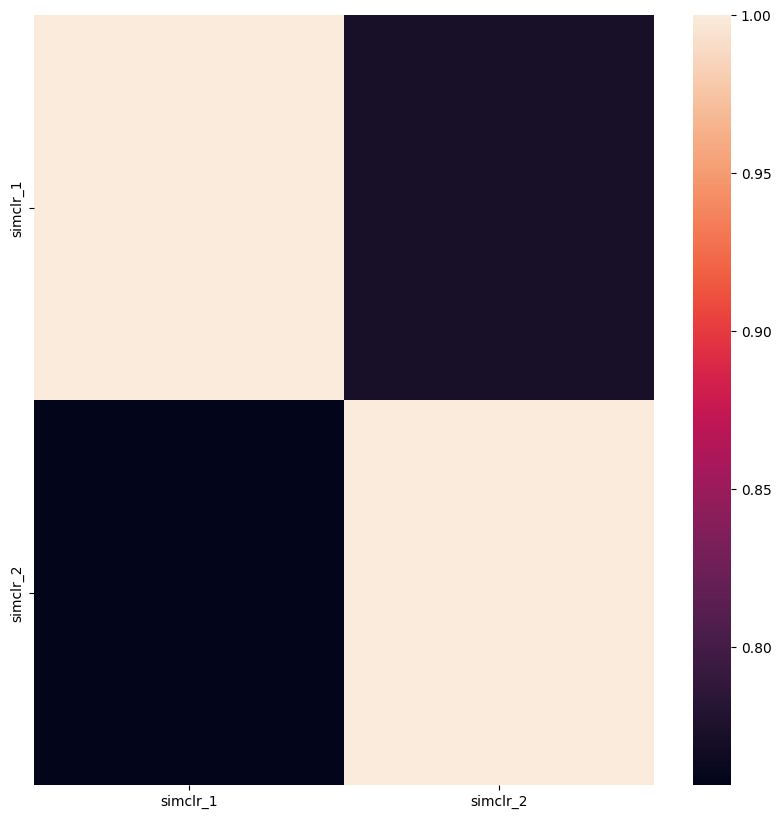

In [17]:
ticklabels = models_dirs.keys()
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(correl_matrix, annot=False, xticklabels=ticklabels, yticklabels=ticklabels,ax=ax)
plt.show()

In [18]:
convolved

NameError: name 'convolved' is not defined

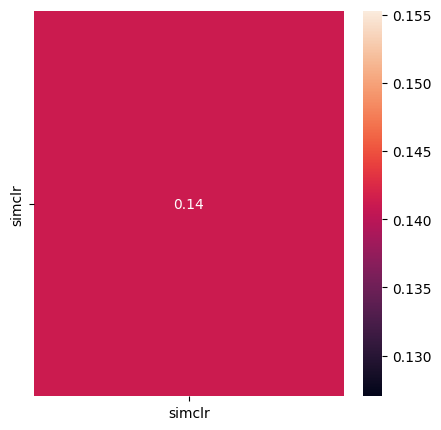

In [19]:
# convolve heatmap with step 5
# BEWARE: NEED 5 MODELS PER CONFIG. CURRENTLY LAST ONE HAS 4, WHICH REDUCES THE OBTAINED VALUE.
step=5
ticklabels = models_dirs.keys()
fig,ax=plt.subplots(figsize=(5,5))
convolved = scipy.signal.convolve2d(correl_matrix, np.ones((5,5)))[4::5,4::5] / 25
labels = list(ticklabels)[::step]
labels = [elem[:-2] for elem in labels]
sns.heatmap(convolved, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
plt.show()

# Use disimilarity matrix (pairwise euclidean distance)
Beware: the metric is asymmetric, maybe average ?
Use euclidean or cosine distance ? euclidean for betavae and cosine for simclr ?

In [14]:
# compute pairwise euclidean distance between all subjects and select a restricted neighborhood
proportion = 0.2
nb_subjects = models_embeddings[list(models_embeddings.keys())[0]].shape[0]
nb_neigh = int(nb_subjects * proportion)
nb_models = len(models_embeddings.keys())
tau_mat, p_value_mat = np.zeros((nb_models, nb_models)), np.zeros((nb_models, nb_models))

for i, (name1, model1) in enumerate(models_embeddings.items()):
    for j, (name2, model2) in enumerate(models_embeddings.items()):

        selected_dists_1 = []
        selected_dists_2 = []
        pairwise_dists_1 = euclidean_distances(model1)
        #pairwise_dists_1 = cosine_similarity(model1)
        pairwise_dists_2 = euclidean_distances(model2)
        #pairwise_dists_2 = cosine_similarity(model2)
        for idx, (dists_1, dists_2) in enumerate(zip(pairwise_dists_1, pairwise_dists_2)):
            dists_1 = np.delete(dists_1, idx) #remove distance to itself
            dists_2 = np.delete(dists_2, idx)
            idxs=np.argsort(dists_1) #get closest subjects for model1
            selected_dists_1=selected_dists_1+dists_1[idxs[:nb_neigh]].tolist()
            selected_dists_2=selected_dists_2+dists_2[idxs[:nb_neigh]].tolist() #apply same subject selection to model2
        tau, p = scipy.stats.kendalltau(selected_dists_1, selected_dists_2)
        tau_mat[i,j]=tau
        p_value_mat[i,j]=p

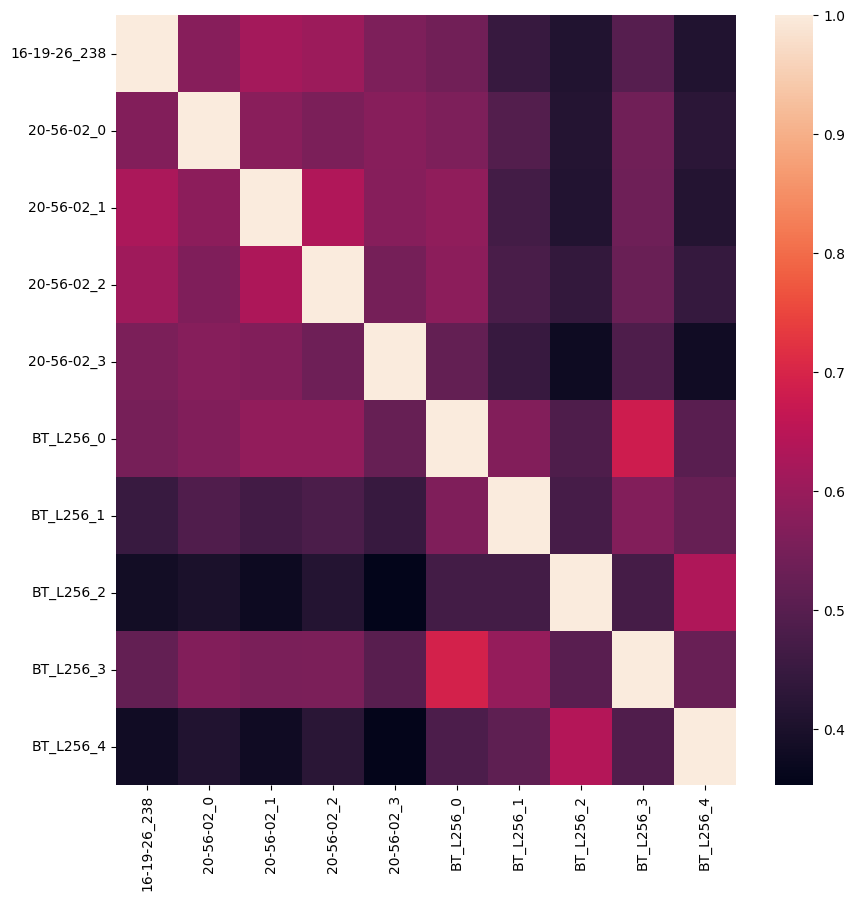

In [15]:
ticklabels = models_dirs.keys()
#fig, axs = plt.subplots(figsize=(12, 6), ncols=2)
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(tau_mat, annot=False, xticklabels=ticklabels, yticklabels=ticklabels,ax=ax)
#sns.heatmap(p_value_mat, annot=True, xticklabels=ticklabels, yticklabels=ticklabels, ax=axs[1])
plt.show()

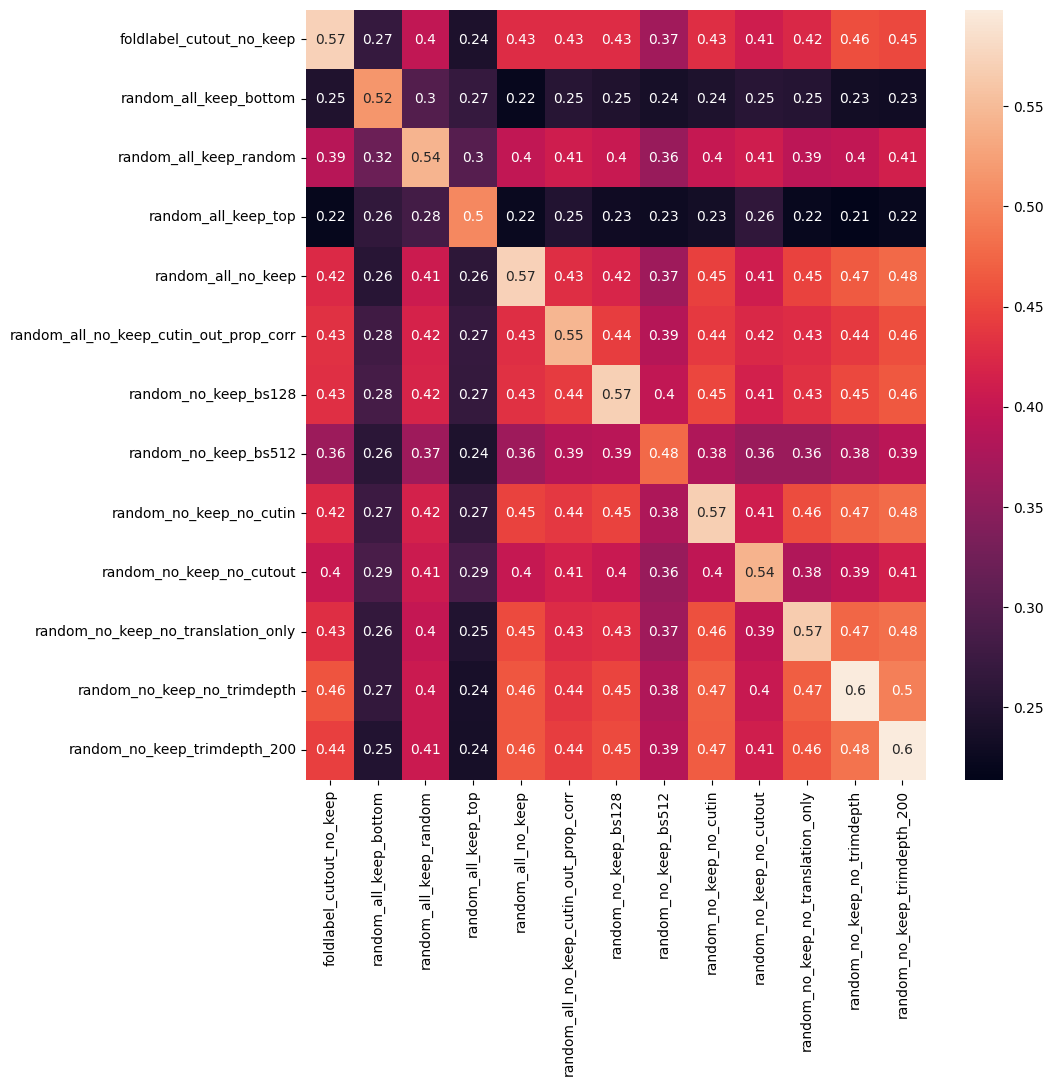

In [14]:
# convolve heatmap with step 5
# BEWARE: NEED 5 MODELS PER CONFIG. CURRENTLY LAST ONE HAS 4, WHICH REDUCES THE OBTAINED VALUE.
step=5
ticklabels = models_dirs.keys()
fig,ax=plt.subplots(figsize=(10,10))
convolved = scipy.signal.convolve2d(tau_mat, np.ones((5,5)))[4::5,4::5] / 25
labels = list(ticklabels)[::step]
labels = [elem[:-2] for elem in labels]
sns.heatmap(convolved, annot=True, xticklabels=labels, yticklabels=labels, ax=ax)
plt.show()

In [34]:
pairwise_dists_1

array([[1.        , 0.80704092, 0.87306826, ..., 0.67543663, 0.5005344 ,
        0.6747323 ],
       [0.80704092, 1.        , 0.84124211, ..., 0.87137303, 0.62139335,
        0.76880212],
       [0.87306826, 0.84124211, 1.        , ..., 0.75202918, 0.66694808,
        0.59420683],
       ...,
       [0.67543663, 0.87137303, 0.75202918, ..., 1.        , 0.4968957 ,
        0.84798499],
       [0.5005344 , 0.62139335, 0.66694808, ..., 0.4968957 , 1.        ,
        0.38506947],
       [0.6747323 , 0.76880212, 0.59420683, ..., 0.84798499, 0.38506947,
        1.        ]])

# Number of common nearest neighbours

In [2]:
## two models

# orbital
models_dirs = {'orbital_1': '/neurospin/dico/jlaval/Output/orbital_extremities_pepper/18-50-28_0/UKB_random_embeddings/train_val_embeddings.csv',
               'orbital_2': '/neurospin/dico/jlaval/Output/orbital_extremities_pepper/18-50-28_1/UKB_random_embeddings/train_val_embeddings.csv',
               'orbital_3': '/neurospin/dico/jlaval/Output/orbital_extremities_pepper/18-50-28_2/UKB_random_embeddings/train_val_embeddings.csv'
               }

# cingulate
"""
models_dirs = {'cingulate_1': '/neurospin/dico/jlaval/Output/cingulate_extremities_pepper/22-40-56_0/UKB_random_embeddings/train_val_embeddings.csv',
               'cingulate_2': '/neurospin/dico/jlaval/Output/cingulate_extremities_pepper/22-40-56_1/UKB_random_embeddings/train_val_embeddings.csv',
               'cingulate_3': '/neurospin/dico/jlaval/Output/cingulate_extremities_pepper/22-40-56_2/UKB_random_embeddings/train_val_embeddings.csv'
}
"""

# FIP LR

models_dirs = {'FIP_1': '/neurospin/dico/jlaval/Output/FIP_LR/18-19-19_0/ukb_right_random_embeddings/train_val_embeddings.csv', # 84%
               'FIP_2': '/neurospin/dico/jlaval/Output/FIP_LR/18-19-19_1/ukb_right_random_embeddings/train_val_embeddings.csv', # 77%
               'FIP_3': '/neurospin/dico/jlaval/Output/FIP_LR/18-19-19_3/ukb_right_random_embeddings/train_val_embeddings.csv'  #77%

}


#FIP_LR_20_60
"""
models_dirs = {'FIP_1': '/neurospin/dico/jlaval/Output/FIP_LR_cutout20_cutin60/11-04-00_0/ukb_right_random_embeddings/train_val_embeddings.csv', # this one didn't converge well
               'FIP_2': '/neurospin/dico/jlaval/Output/FIP_LR_cutout20_cutin60/11-04-00_1/ukb_right_random_embeddings/train_val_embeddings.csv', # 82%+
               'FIP_3': '/neurospin/dico/jlaval/Output/FIP_LR_cutout20_cutin60/11-04-00_2/ukb_right_random_embeddings/train_val_embeddings.csv' #82%+
}
"""

#FIP_right only ! (Champollion V0)
"""
models_dirs = {'FIP_1': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_2': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_1/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_3': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_2/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_4': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_3/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_5': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_embeddings/train_val_embeddings.csv'
               
}
"""
# FIP_left
"""
models_dirs = {'FIP_1': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_0/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_2': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_1/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_3': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_2/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_4': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_3/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_5': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_left/14-56-46_4/ukb_random_embeddings/train_val_embeddings.csv',
}
"""
#FIP_right only ! : epochs wise !
## bad convergence model
"""
models_dirs = {'FIP_1': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_epoch0_embeddings/train_val_embeddings.csv',
               'FIP_2': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_epoch20_embeddings/train_val_embeddings.csv',
               'FIP_3': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_epoch40_embeddings/train_val_embeddings.csv',
               'FIP_4': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_epoch60_embeddings/train_val_embeddings.csv',
               'FIP_5': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_epoch80_embeddings/train_val_embeddings.csv',
               'FIP_6': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_epoch100_embeddings/train_val_embeddings.csv',
               'FIP_7': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_0/ukb_random_epoch120_embeddings/train_val_embeddings.csv',
}
"""
#FIP_right only ! : epochs wise !
## good convergence model
"""
models_dirs = {'FIP_1': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_epoch0_embeddings/train_val_embeddings.csv',
               'FIP_2': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_epoch20_embeddings/train_val_embeddings.csv',
               'FIP_3': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_epoch40_embeddings/train_val_embeddings.csv',
               'FIP_4': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_epoch60_embeddings/train_val_embeddings.csv',
               'FIP_5': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_epoch80_embeddings/train_val_embeddings.csv',
               'FIP_6': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_epoch100_embeddings/train_val_embeddings.csv',
               'FIP_7': '/neurospin/dico/data/deep_folding/current/models/Champollion_V0/FIP_right/20-16-33_4/ukb_random_epoch120_embeddings/train_val_embeddings.csv',
}
"""
# FIP_right cutout masked
models_dirs = {'FIP_1': '/neurospin/dico/jlaval/Output/FIP_right_40k/cutout_masked/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_2': '/neurospin/dico/jlaval/Output/FIP_right_40k/cutout_masked_1/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_3': '/neurospin/dico/jlaval/Output/FIP_right_40k/cutout_masked_2/ukb_random_embeddings/train_val_embeddings.csv'

}
###### NEW CHAMPOLLION
models_dirs = {'FIP_1': '/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj/20-39-33_0/ukb_random_epoch40_embeddings/train_val_embeddings.csv',
               'FIP_2': '/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj/16-33-05_1/ukb_random_epoch40_embeddings/train_val_embeddings.csv',
               'FIP_3': '/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj/16-33-05_0/ukb_random_epoch40_embeddings/train_val_embeddings.csv',
               #'FIP_4': '/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj/20-39-33_1/ukb_random_embeddings/train_val_embeddings.csv',
               'FIP_5': '/neurospin/dico/jlaval/Output/5_models_FIP_right_3_layer_proj/20-44-29_19/ukb_random_epoch40_embeddings/train_val_embeddings.csv'
}

# cingulate
models_dirs = {'cing_1': '/neurospin/dico/jlaval/Output/CINGULATE_40k/11-22-27_0/UKB_random_embeddings/train_val_embeddings.csv',
               'cing_2': '/neurospin/dico/jlaval/Output/CINGULATE_40k/11-22-27_1/UKB_random_embeddings/train_val_embeddings.csv',
               'cing_3': '/neurospin/dico/jlaval/Output/CINGULATE_40k/11-22-27_2/UKB_random_embeddings/train_val_embeddings.csv',
               'cing_4': '/neurospin/dico/jlaval/Output/CINGULATE_40k/11-22-27_3/UKB_random_embeddings/train_val_embeddings.csv',
               'cing_5': '/neurospin/dico/jlaval/Output/CINGULATE_40k/11-22-27_5/UKB_random_embeddings/train_val_embeddings.csv'
}

ndims=32

In [3]:
# load embeddings
models_embeddings = {}
for model, directory in models_dirs.items():
    embeddings = pd.read_csv(directory)
    models_embeddings[model]=embeddings
dims = [f'dim{k}' for k in range(1,ndims+1)]

In [4]:
# compute pairwise cosine distance between all subjects and select a restricted neighborhood
nb_subjects = models_embeddings[list(models_embeddings.keys())[0]].shape[0]
nb_models = len(models_embeddings.keys())

## Takes a lot of memory !

In [5]:
df_pairwise = {} ## PB de mémoire ici ???
for name, model in models_embeddings.items():
    subjects = model['ID'].to_list()
    pairwise_dists = 1-cosine_similarity(model[dims].to_numpy())
    pairwise_dists = pd.DataFrame(pairwise_dists, columns=subjects, index=subjects)
    df_pairwise[name]=pairwise_dists

In [6]:
nb_neigh = 100
names=df_pairwise.keys()
intersections = pd.DataFrame(np.full(shape=(len(names), len(names)), fill_value=nb_neigh), index=names, columns=names, dtype=object)

for i, (name1, pairwise_dists_1) in enumerate(df_pairwise.items()):
    for j, (name2, pairwise_dists_2) in enumerate(df_pairwise.items()):
        intersection_list = []
        if j>=i:
            pass
        else:
            for subject in tqdm(subjects[:1000]):
                ## for each column, sort the rows and get 30 subject names
                nearest_1 = pairwise_dists_1[subject].sort_values().index.tolist()[1:nb_neigh+1]
                nearest_2 = pairwise_dists_2[subject].sort_values().index.tolist()[1:nb_neigh+1]
                intersection = len(set(nearest_1).intersection(nearest_2))
                intersection_list.append(intersection)
            intersections.loc[name1,name2]=intersection_list
            intersections.loc[name2,name1]=intersection_list

100%|██████████| 1000/1000 [00:16<00:00, 61.93it/s]


## Memory efficient but less flexible

In [5]:
nb_neigh = 30
nb_subjects = 10000
#nb_subjects = 20000
nb_samples = 10000
names=models_embeddings.keys()
intersections = pd.DataFrame(np.full(shape=(len(names), len(names)), fill_value=nb_neigh), index=names, columns=names, dtype=object)
for i, (name1, model_1) in enumerate(models_embeddings.items()):
    # NB: in practice we assume that subjects_1 == subjects_2
    # model 1
    subjects_1 = model_1['ID'][:nb_subjects].to_list()
    pairwise_dists_1 = 1-cosine_similarity(model_1[dims][:nb_subjects].to_numpy())
    pairwise_dists_1 = pd.DataFrame(pairwise_dists_1, columns=subjects_1, index=subjects_1)
    for j, (name2, model_2) in enumerate(models_embeddings.items()):
        if j>=i:
            pass
        else:
            # model 2
            subjects_2 = model_2['ID'][:nb_subjects].to_list()
            pairwise_dists_2 = 1-cosine_similarity(model_2[dims][:nb_subjects].to_numpy())
            pairwise_dists_2 = pd.DataFrame(pairwise_dists_2, columns=subjects_2, index=subjects_2)
            
            intersection_list = []
            for subject in tqdm(subjects_1[:nb_samples]):
                ## for each column, sort the rows and get 30 subject names
                nearest_1 = pairwise_dists_1[subject].sort_values().index.tolist()[1:nb_neigh+1]
                nearest_2 = pairwise_dists_2[subject].sort_values().index.tolist()[1:nb_neigh+1]
                intersection = len(set(nearest_1).intersection(nearest_2))
                intersection_list.append(intersection)
            intersections.loc[name1,name2]=intersection_list
            intersections.loc[name2,name1]=intersection_list

            del pairwise_dists_2
    del pairwise_dists_1

100%|██████████| 10000/10000 [00:16<00:00, 611.87it/s]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


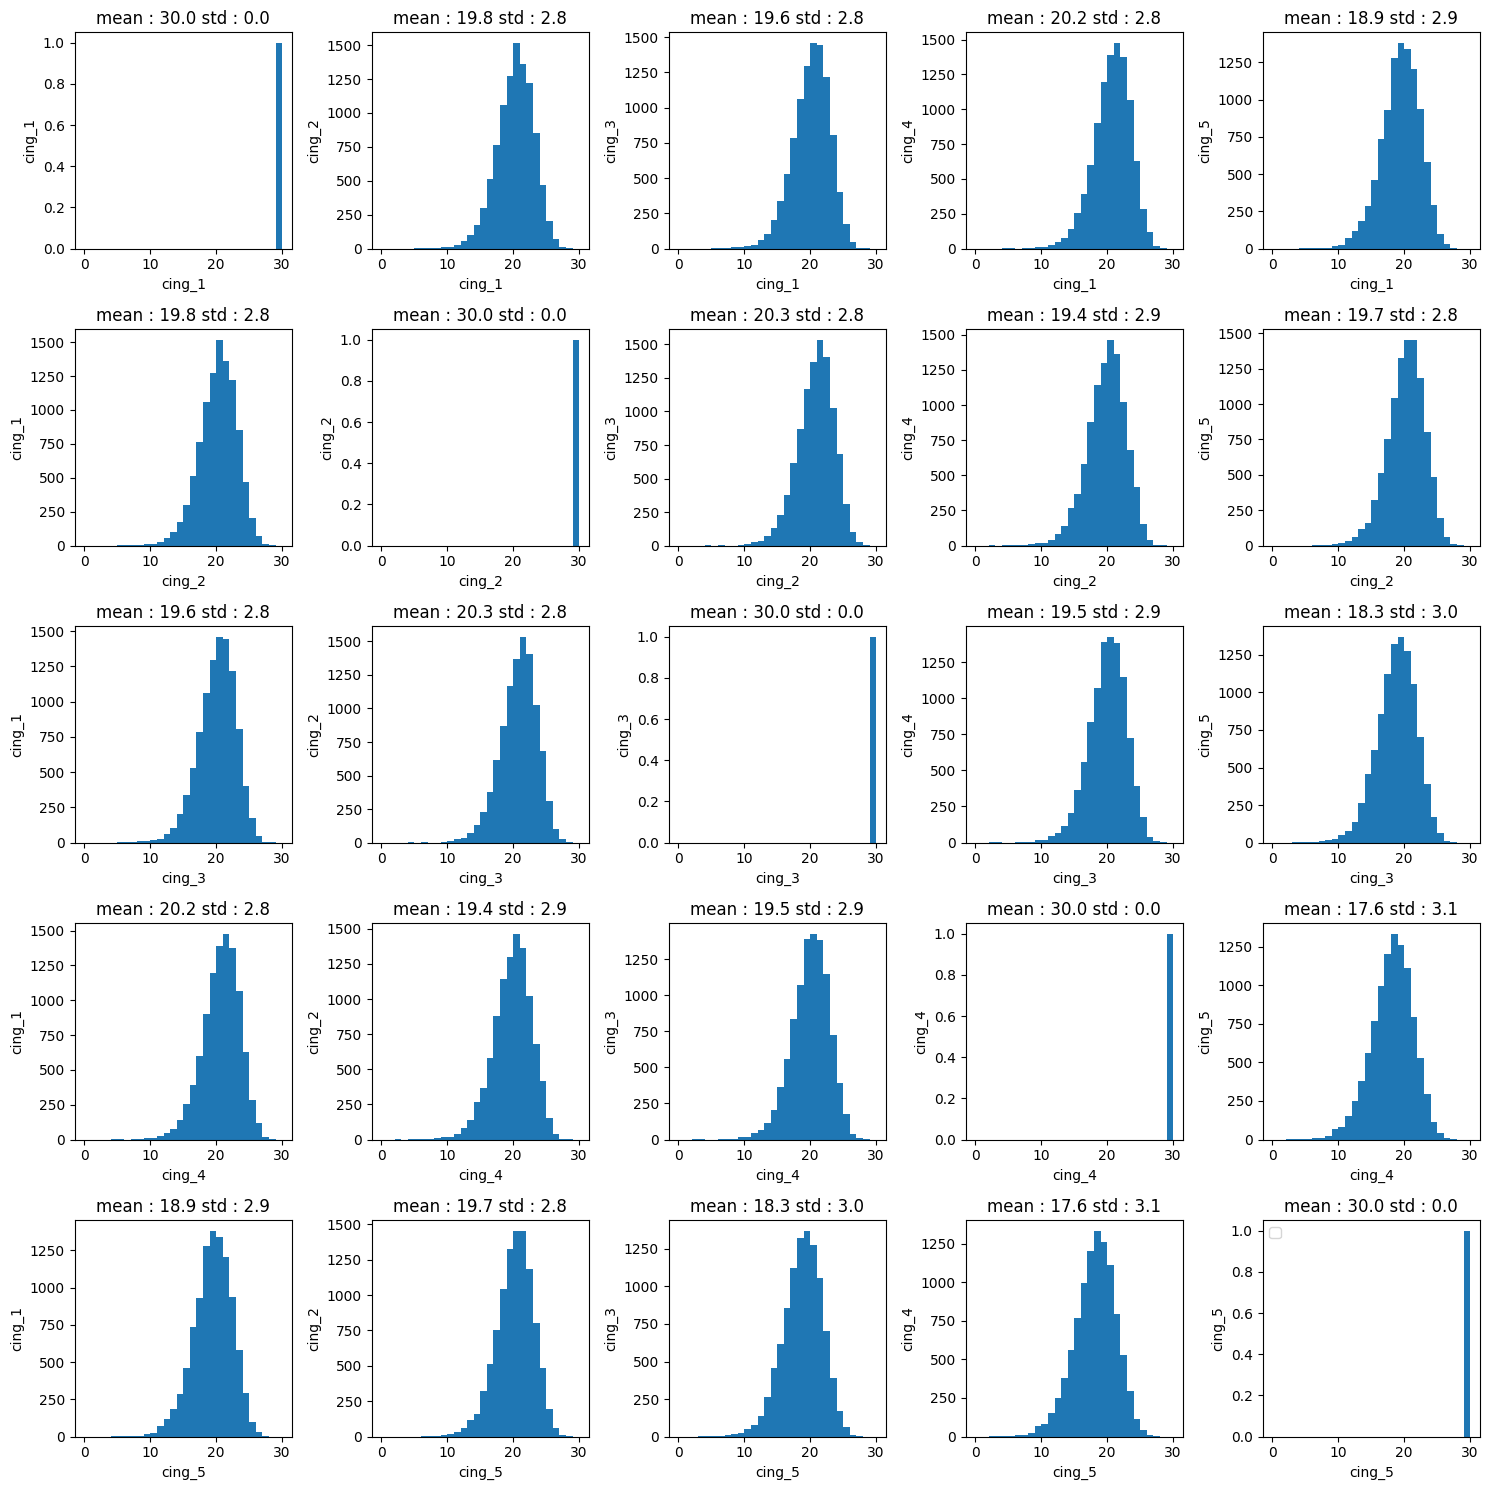

In [6]:
## plot
fig, axs = plt.subplots(nrows=len(intersections.keys()), ncols=len(intersections.keys()), figsize=(3*len(intersections.keys()),3*len(intersections.keys())), dpi=100)
for i, name1 in enumerate(names):
    for j, name2 in enumerate(names):
        intersection = intersections.loc[name1, name2]
        axs[i,j].hist(intersection, bins=range(0, nb_neigh+1))
        axs[i,j].set_xlabel(name1)
        axs[i,j].set_ylabel(name2)
        axs[i,j].set_title(f'mean : {np.mean(intersection):.1f} std : {np.std(intersection):.1f}')
plt.legend()
plt.tight_layout()
plt.show()

In [38]:
# get the names of the most unstable subs
inter_list = []
for i, key1 in enumerate(models_dirs.keys()):
    for j, key2 in enumerate(models_dirs.keys()):
        if j>=i:
            pass
        else:
            intersection = intersections[key1][key2]
            inter_list.append(intersection)

avg_intersect = np.mean(inter_list, axis=0)
subs = subjects_1[:len(avg_intersect)]

avg_intersect = pd.DataFrame(data=avg_intersect, index=subs, columns=['avg_inter']).sort_values(by='avg_inter')

In [47]:
avg_intersect[:30]

,avg_inter
sub-2219278,8.7
sub-1921185,9.3
sub-1473379,9.6
sub-1587802,9.7
sub-2046568,10.0
sub-1513646,10.1
sub-2097213,10.1
sub-1446951,10.6
sub-1698640,10.7
sub-1265987,10.7


In [40]:
avg_intersect['avg_inter'].index.tolist()[:30]

['sub-2219278',
 'sub-1921185',
 'sub-1473379',
 'sub-1587802',
 'sub-2046568',
 'sub-1513646',
 'sub-2097213',
 'sub-1446951',
 'sub-1698640',
 'sub-1265987',
 'sub-2040124',
 'sub-2202452',
 'sub-1551502',
 'sub-1401546',
 'sub-2223597',
 'sub-2021559',
 'sub-2043972',
 'sub-1918349',
 'sub-1524141',
 'sub-1190602',
 'sub-1793228',
 'sub-1025328',
 'sub-2320277',
 'sub-2144673',
 'sub-1545511',
 'sub-1360883',
 'sub-2235283',
 'sub-2323853',
 'sub-1817429',
 'sub-2057411']

In [42]:
## take the max of the intersections instead ! (because some subjects could have multiple attractors ?)
# get the names of the most unstable subs
## BUT MAX LOOKS UNSUITABLE WHEN N (MODELS) IS LARGE ? Or N would need to be huge ?
# min wouldn't account for the multiple attractors issue
# mean / median ? mean sound best. Test both mean and max
max_intersect = np.max(inter_list, axis=0)
max_intersect = pd.DataFrame(data=max_intersect, index=subs, columns=['max_inter']).sort_values(by='max_inter')
print(max_intersect)
max_intersect['max_inter'].index.tolist()[:30]

             max_inter
sub-2219278         13
sub-2202452         14
sub-1921185         15
sub-1265987         15
sub-2043972         15
...                ...
sub-1454090         28
sub-1110137         28
sub-2086631         28
sub-2008566         28
sub-1648362         28

[10000 rows x 1 columns]


['sub-2219278',
 'sub-2202452',
 'sub-1921185',
 'sub-1265987',
 'sub-2043972',
 'sub-2046568',
 'sub-2289684',
 'sub-1449967',
 'sub-1172256',
 'sub-2137928',
 'sub-1360883',
 'sub-2236846',
 'sub-1516310',
 'sub-1541828',
 'sub-1698640',
 'sub-2223597',
 'sub-1513646',
 'sub-1222447',
 'sub-1793228',
 'sub-1243165',
 'sub-1545511',
 'sub-2012582',
 'sub-2298521',
 'sub-2323853',
 'sub-1025328',
 'sub-1335842',
 'sub-1401546',
 'sub-2221936',
 'sub-2217099',
 'sub-1088692']

(array([   7.,   18.,   82.,  267.,  964., 2250., 3097., 2496.,  753.,
          66.]),
 array([ 8.7 , 10.37, 12.04, 13.71, 15.38, 17.05, 18.72, 20.39, 22.06,
        23.73, 25.4 ]),
 <BarContainer object of 10 artists>)

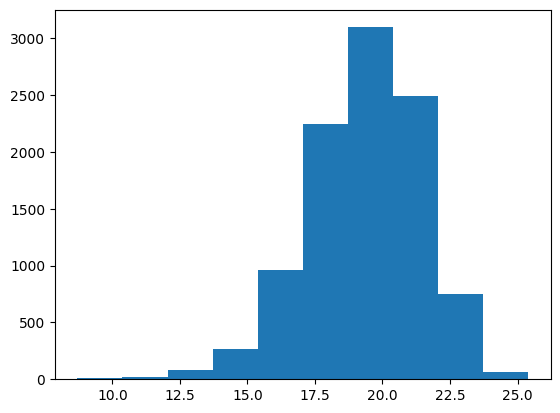

In [43]:
## plot avg_intersect distrib
plt.hist(avg_intersect)

(array([2.000e+00, 7.000e+00, 6.400e+01, 1.390e+02, 9.940e+02, 1.320e+03,
        4.048e+03, 1.802e+03, 1.523e+03, 1.010e+02]),
 array([13. , 14.5, 16. , 17.5, 19. , 20.5, 22. , 23.5, 25. , 26.5, 28. ]),
 <BarContainer object of 10 artists>)

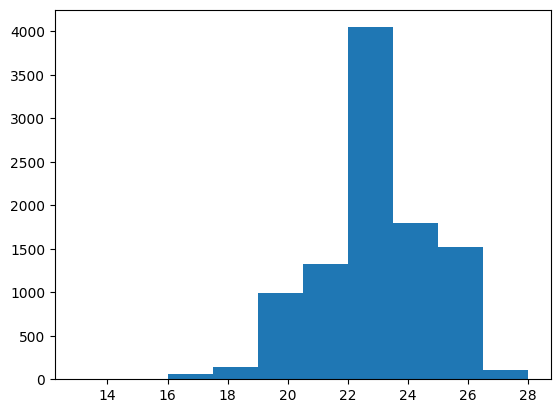

In [44]:
## plot max_intersect distrib
plt.hist(max_intersect)

In [69]:
## consider weird subject
df = models_embeddings['cing_1']
df.loc[(df['ID']=='sub-4989927')]
## index 30401

,ID,dim1,dim2,dim3,dim4,dim5,dim6,dim7,dim8,dim9,...,dim23,dim24,dim25,dim26,dim27,dim28,dim29,dim30,dim31,dim32
30401,sub-4989927,-2.676993,7.830716,15.289727,-9.894063,5.136464,-12.98907,1.047161,-7.973912,14.01398,...,10.722527,10.1464,-4.737314,-0.049146,15.139295,-2.207162,6.229978,-0.314605,-12.128287,3.194982


In [110]:
nb_neigh = 30
for i, (name1, df1) in enumerate(models_embeddings.items()):
    for j, (name2, df2) in enumerate(models_embeddings.items()):
        if j >= i:
            pass
        else:
            sim = cosine_similarity(df1.iloc[30401][dims].to_numpy().reshape(1,-1), df1[dims].to_numpy())
            dist = 1 - sim
            df_dist = pd.DataFrame(data=dist[0], index=df1['ID'].tolist()).sort_values(by=0)
            nearest1 = df_dist.index.tolist()[:nb_neigh]

            sim = cosine_similarity(df2.iloc[30401][dims].to_numpy().reshape(1,-1), df2[dims].to_numpy())
            dist = 1 - sim
            df_dist = pd.DataFrame(data=dist[0], index=df2['ID'].tolist()).sort_values(by=0)
            nearest2 = df_dist.index.tolist()[:nb_neigh]

            intersec = len(set(nearest1).intersection(nearest2))
            print(name1, name2, intersec)

cing_2 cing_1 12
cing_3 cing_1 12
cing_3 cing_2 12
cing_4 cing_1 15
cing_4 cing_2 14
cing_4 cing_3 13
cing_5 cing_1 10
cing_5 cing_2 17
cing_5 cing_3 15
cing_5 cing_4 13


In [ ]:
# TODO: iterate on all subjects, and use parallelism !! (need to store only 32*42000 matrices instead of 42000*42000)

# COMPARISON TO MORPHOMETRY

In [5]:
mods = {'B-VAE': [],
        'SimCLR': [],
        'morpho all': [],
        'morpho shape': [],
        'morpho pos': []}

sulci = ['S.T.s', 'CINGULATE']
sides = ['left', 'right']

models = {sulcus+'_'+side: mods for sulcus in sulci for side in sides}

In [52]:
# select morpho rows based on info dHCP and simple morpho to get measures corresponding to right sessions
# done only once to define the indexes to keep
info_dHCP = pd.read_csv('/neurospin/dico/jlaval/data/info_dHCP.csv')
sulcus = 'S.T.s._right'
morpho_params = ['hull_junction_length_talairach', 'maxdepth_talairach', 'GM_thickness', 'opening', 'meandepth_talairach', 'surface_talairach']
morpho_df = pd.DataFrame(columns=morpho_params)

for idx, (id, session, _, _) in info_dHCP.iterrows():
    morpho_dir = f'/neurospin/grip/external_databases/dHCP_CR_JD_2018/Projects/denis/release3_morpho_bids/sub-{id}/ses-{session}/anat/t1mri/default_acquisition/default_analysis/folds/3.1/default_session_auto/{id}_default_session_auto_sulcal_morphometry.csv'
    morpho = pd.read_csv(morpho_dir, sep=';')
    morpho_sulcus = morpho.loc[morpho['sulcus']==sulcus][morpho_params]
    morpho_df = morpho_df.append(morpho_sulcus)

df_morpho = pd.concat([info_dHCP, morpho_df.set_index(info_dHCP.index)], axis=1)

for idx, row in morpho.iterrows():
    if df_morpho.loc[df_morpho['participant_id']==row['subject']].shape[0]==0:
        morpho.drop(idx, inplace=True)
    elif row['hullJunctionsLength'] != df_morpho.loc[df_morpho['participant_id']==row['subject']].hull_junction_length_talairach.tolist()[0]:
        morpho.drop(idx, inplace=True)

index_to_keep = morpho.index.tolist()

KeyError: 'subject'

In [54]:
# compute and return 3 dfs
def format_morpho(df):

    length = df['hullJunctionsLength'].to_numpy()
    extremity1 = df[['extremity1x', 'extremity1y', 'extremity1z']].to_numpy()
    extremity2 = df[['extremity2x', 'extremity2y', 'extremity2z']].to_numpy()
    coords = extremity1-extremity2
    d = np.sqrt(np.square(coords[:,0]) + np.square(coords[:,1]) + np.square(coords[:,2]))

    foldness = (length - d) / length

    df['SulcusLength']=d # probably not used ?
    df['foldness']=foldness

    # first positional measures
    posi_params = ['gravityCenter_x', 'gravityCenter_y', 'gravityCenter_z',
                'normal_x', 'normal_y', 'normal_z',
                'direction_x', 'direction_y', 'direction_z']

    cols = [f'dim{k}' for k in range(1,len(posi_params)+1)]
    embeddings_pos = df[['subject']+posi_params]
    embeddings_pos.columns=['ID']+cols

    shape_params = ['surface', 'geodesicDepthMax', 'geodesicDepthMean', 'hullJunctionsLength',
                'connectedComponentsAllRels', 'connectedComponents', 'foldness']


    cols = [f'dim{k}' for k in range(1,len(shape_params)+1)]

    embeddings_shape = df[['subject']+shape_params]
    embeddings_shape.columns=['ID']+cols

    all_params = posi_params + shape_params

    cols = [f'dim{k}' for k in range(1,len(all_params)+1)]

    embeddings_all = df[['subject']+all_params]
    embeddings_all.to_csv('/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/crops/2mm/S.T.s.baby/mask/morpho_labels.csv', index=False)
    embeddings_all.columns=['ID']+cols

    return(embeddings_all, embeddings_shape, embeddings_pos)

In [60]:
# load embeddings of each model
sulci = ['S.T.s'] # temporary...
sides = ['right']

#S.T.s_left
models['S.T.s_right']['B-VAE'] = pd.read_csv('/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/BetaVAE/2023-12-11/14-10-52/analysis/embeddings_dHCP.csv')
models['S.T.s_right']['SimCLR'] = pd.read_csv('/neurospin/dico/jlaval/Runs/02_STS_babies/Program/Output/2023-11-29/09-59-38_188/dHCP_embeddings/full_embeddings.csv')

# morpho
for sulcus in sulci:
    for side in sides:
        morpho = pd.read_csv(f'/neurospin/dico/data/deep_folding/current/datasets/dHCP_374_subjects/morphometry/morphometry_statistics/right/morpho_{sulcus}._{side}.dat', sep=' ')
        morpho = morpho.loc[index_to_keep]
        morphos = format_morpho(morpho)
        models[f'{sulcus}_{side}']['morpho all'], models[f'{sulcus}_{side}']['morpho shape'], models[f'{sulcus}_{side}']['morpho pos'] = morphos[0], morphos[1], morphos[2]

In [122]:
def dist_embeddings(df1, df2, dist1='euclidean', dist2='euclidean', nb_neigh=-1):

    """
    Returns disymilarity between two embeddings using rank test on pairwise distances
    """

    # then select all subjects
    if nb_neigh == -1:
        nb_neigh = df1.shape[0]-1

    model1 = df1.drop('ID', axis=1).to_numpy()
    model2 = df2.drop('ID', axis=1).to_numpy()

    model1 = scaler.fit_transform(model1)
    model2 = scaler.fit_transform(model2)

    selected_dists_1 = []
    selected_dists_2 = []
    
    if dist1=='euclidean':
        pairwise_dists_1 = euclidean_distances(model1)
    elif dist1=='cosine':
        pairwise_dists_1 = cosine_similarity(model1)
    if dist2=='euclidean':
        pairwise_dists_2 = euclidean_distances(model2)
    elif dist2=='cosine':
        pairwise_dists_2 = cosine_similarity(model2)

    for dists_1, dists_2 in zip(pairwise_dists_1, pairwise_dists_2):
        dists_1 = np.delete(dists_1, 0) #remove distance to itself
        dists_2 = np.delete(dists_2, 0)
        idxs=np.argsort(dists_1) #get closest subjects for model1
        selected_dists_1=selected_dists_1+dists_1[idxs[:nb_neigh]].tolist()
        selected_dists_2=selected_dists_2+dists_2[idxs[:nb_neigh]].tolist() #apply same subject selection to model2
    print(selected_dists_1)
    tau, p = scipy.stats.kendalltau(selected_dists_1, selected_dists_2)
    
    return(tau, p)

In [18]:
# y a-t-il des nans ? Récupérer les index pour supprimer les sujets avant de faire les calculs de distances pairwise...

In [228]:
df1 = models['S.T.s_right']['SimCLR']
df2 = models['S.T.s_right']['morpho all']
dist1='euclidean'
dist2='euclidean'
nb_neigh=-1

# then select all subjects
if nb_neigh == -1:
    nb_neigh = df1.shape[0]-1

model1 = df1.drop('ID', axis=1).to_numpy()
model2 = df2.drop('ID', axis=1).to_numpy()

model1 = scaler.fit_transform(model1)
model2 = scaler.fit_transform(model2)

selected_dists_1 = []
selected_dists_2 = []

if dist1=='euclidean':
    pairwise_dists_1 = euclidean_distances(model1)
elif dist1=='cosine':
    pairwise_dists_1 = cosine_similarity(model1)
if dist2=='euclidean':
    pairwise_dists_2 = euclidean_distances(model2)
elif dist2=='cosine':
    pairwise_dists_2 = cosine_similarity(model2)

for idx, (dists_1, dists_2) in enumerate(zip(pairwise_dists_1, pairwise_dists_2)):
    dists_1 = np.delete(dists_1, idx) #remove distance to itself
    dists_2 = np.delete(dists_2, idx)
    idxs=np.argsort(dists_1) #get closest subjects for model1
    selected_dists_1=selected_dists_1+dists_1[idxs[:nb_neigh]].tolist()
    selected_dists_2=selected_dists_2+dists_2[idxs[:nb_neigh]].tolist() #apply same subject selection to model2
tau, p = scipy.stats.kendalltau(selected_dists_1, selected_dists_2)
print(tau)